In [301]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

## Load data:

In [302]:
data = pd.read_csv("ElectionsData.csv", header=0)

## Data exploration - Identify and set the correct type:

In [303]:
print('Number of features: '+str(len(data.columns.values)))
data.dtypes

Number of features: 38


Vote                                              object
Occupation_Satisfaction                          float64
Avg_monthly_expense_when_under_age_21            float64
AVG_lottary_expanses                             float64
Most_Important_Issue                              object
Avg_Satisfaction_with_previous_vote              float64
Looking_at_poles_results                          object
Garden_sqr_meter_per_person_in_residancy_area    float64
Married                                           object
Gender                                            object
Voting_Time                                       object
Financial_balance_score_(0-1)                    float64
%Of_Household_Income                             float64
Avg_government_satisfaction                      float64
Avg_education_importance                         float64
Avg_environmental_importance                     float64
Avg_Residancy_Altitude                           float64
Yearly_ExpensesK               

In [304]:
non_float_data = data.select_dtypes(exclude=['floating','int'])
non_float_data.describe()
for column in non_float_data:
    print(str(column)+": \n"+str(data[column].unique()))

Vote: 
['Purples' 'Greens' 'Browns' 'Pinks' 'Blues' 'Oranges' 'Yellows' 'Whites'
 'Reds' 'Greys']
Most_Important_Issue: 
['Healthcare' 'Environment' 'Social' 'Military' 'Financial' 'Education'
 'Other' 'Foreign_Affairs' nan]
Looking_at_poles_results: 
['No' 'Yes' nan]
Married: 
['Yes' 'No' nan]
Gender: 
['Male' 'Female' nan]
Voting_Time: 
['After_16:00' 'By_16:00' nan]
Will_vote_only_large_party: 
['No' 'Yes' 'Maybe' nan]
Age_group: 
['45_and_up' '30-45' 'Below_30' nan]
Main_transportation: 
['Public_or_other' 'Motorcycle_or_truck' 'Foot_or_bicycle' 'Car' nan]
Occupation: 
['Hightech' 'Public_Sector' 'Services_or_Retail' 'Student_or_Unemployed'
 'Industry_or_other' nan]
Financial_agenda_matters: 
['No' 'Yes' nan]


Null values: 91
Unique values: [ 0  1 -1]


Looking_at_poles_results,No,Yes
Looking_at_poles_results_int,,
0,8480,0
1,0,1429


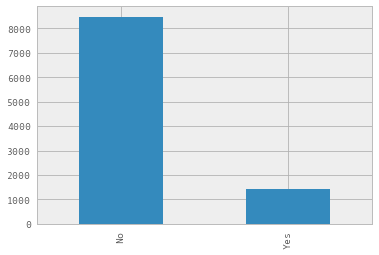

In [305]:
data['Looking_at_poles_results'].value_counts().plot(kind='bar')
print('Null values: '+str(data['Looking_at_poles_results'].isnull().sum()))
data['Looking_at_poles_results_int'] = data['Looking_at_poles_results'].map( {'No':0, 'Yes':1, np.nan:-1}).astype(int)
print('Unique values: '+str(data['Looking_at_poles_results_int'].unique()))
pd.crosstab(data.Looking_at_poles_results_int, data.Looking_at_poles_results, rownames=['Looking_at_poles_results_int'], colnames=['Looking_at_poles_results'])

Null values: 71
Unique values: [ 1  0 -1]


Married,No,Yes
Married_int,,
0,1892,0
1,0,8037


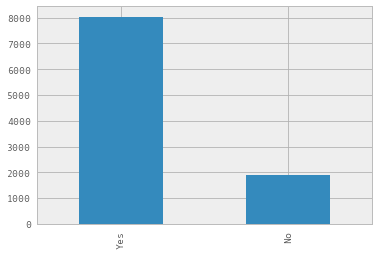

In [306]:
data['Married'].value_counts().plot(kind='bar')
print('Null values: '+str(data['Married'].isnull().sum()))
data['Married_int'] = data['Married'].map( {'No':0, 'Yes':1, np.nan:-1}).astype(int)
print('Unique values: '+str(data['Married_int'].unique()))
pd.crosstab(data.Married_int, data.Married, rownames=['Married_int'], colnames=['Married'])


Null values: 72
Unique values: [ 0  1 -1]


Gender,Female,Male
Gender_int,,
0,0,4912
1,5016,0


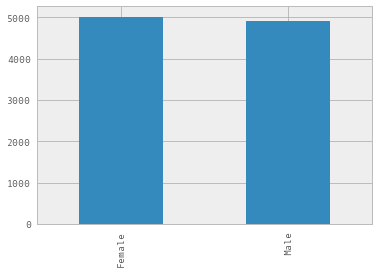

In [307]:
data['Gender'].value_counts().plot(kind='bar')
print('Null values: '+str(data['Gender'].isnull().sum()))
data['Gender_int'] = data['Gender'].map( {'Male':0, 'Female':1, np.nan:-1}).astype(int)
print('Unique values: '+str(data['Gender_int'].unique()))
pd.crosstab(data.Gender_int, data.Gender, rownames=['Gender_int'], colnames=['Gender'])

Null values: 97
Unique values: [ 1  0 -1]


Voting_Time,After_16:00,By_16:00
Voting_Time_int,,
0,0,4859
1,5044,0


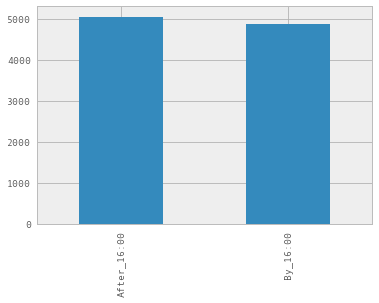

In [308]:
data['Voting_Time'].value_counts().plot(kind='bar')
print('Null values: '+str(data['Voting_Time'].isnull().sum()))
data['Voting_Time_int'] = data['Voting_Time'].map( {'By_16:00':0, 'After_16:00':1, np.nan:-1}).astype(int)
print('Unique values: '+str(data['Voting_Time_int'].unique()))
pd.crosstab(data.Voting_Time_int, data.Voting_Time, rownames=['Voting_Time_int'], colnames=['Voting_Time'])

Null values: 93
Unique values: [ 0  1 -1]


Financial_agenda_matters,No,Yes
Financial_agenda_matters_int,,
0,4892,0
1,0,5015


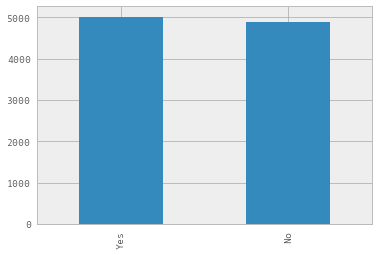

In [309]:
data['Financial_agenda_matters'].value_counts().plot(kind='bar')
print('Null values: '+str(data['Financial_agenda_matters'].isnull().sum()))
data['Financial_agenda_matters_int'] = data['Financial_agenda_matters'].map( {'No':0, 'Yes':1, np.nan:-1}).astype(int)
print('Unique values: '+str(data['Financial_agenda_matters_int'].unique()))
pd.crosstab(data.Financial_agenda_matters_int, data.Financial_agenda_matters, rownames=['Financial_agenda_matters_int'], colnames=['Financial_agenda_matters'])

Null values: 91
Unique values: [                   4                    1                    7
                    5                    2                    0
                    6                    3 -9223372036854775808]


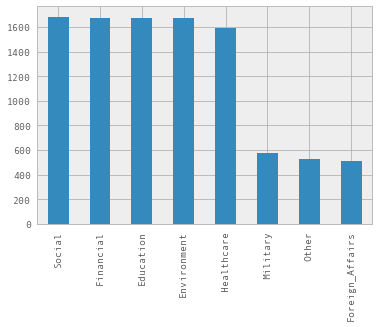

In [310]:
data['Most_Important_Issue'].value_counts().plot(kind='bar')
print('Null values: '+str(data['Most_Important_Issue'].isnull().sum()))
data['Most_Important_Issue_cat'] = data['Most_Important_Issue'].astype("category")
data['Most_Important_Issue_int'] = data['Most_Important_Issue_cat'].cat.rename_categories(range(data['Most_Important_Issue_cat'].nunique())).astype(int)
print('Unique values: '+str(data['Most_Important_Issue_int'].unique()))

Null values: 84
Unique values: [                   1                    0                    2
 -9223372036854775808]


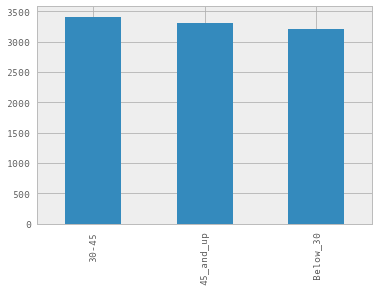

In [311]:
data['Age_group'].value_counts().plot(kind='bar')
print('Null values: '+str(data['Age_group'].isnull().sum()))
data['Age_group_cat'] = data['Age_group'].astype("category")
data['Age_group_int'] = data['Age_group_cat'].cat.rename_categories(range(data['Age_group_cat'].nunique())).astype(int)
print('Unique values: '+str(data['Age_group_int'].unique()))

Null values: 62
Unique values: [                   1                    2                    0
 -9223372036854775808]


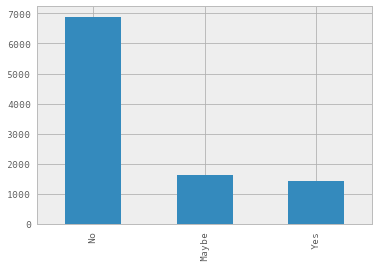

In [312]:
data['Will_vote_only_large_party'].value_counts().plot(kind='bar')
print('Null values: '+str(data['Will_vote_only_large_party'].isnull().sum()))
data['Will_vote_only_large_party_cat'] = data['Will_vote_only_large_party'].astype("category")
data['Will_vote_only_large_party_int'] = data['Will_vote_only_large_party_cat'].cat.rename_categories(range(data['Will_vote_only_large_party_cat'].nunique())).astype(int)
print('Unique values: '+str(data['Will_vote_only_large_party_int'].unique()))

Null values: 85
Unique values: [                   3                    2                    1
                    0 -9223372036854775808]


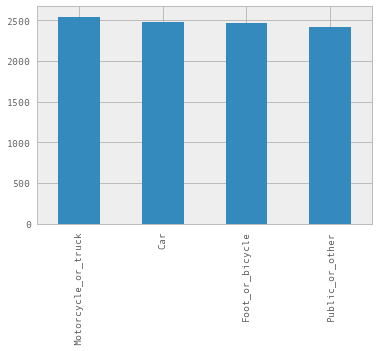

In [313]:
data['Main_transportation'].value_counts().plot(kind='bar')
print('Null values: '+str(data['Main_transportation'].isnull().sum()))
data['Main_transportation_cat'] = data['Main_transportation'].astype("category")
data['Main_transportation_int'] = data['Main_transportation_cat'].cat.rename_categories(range(data['Main_transportation_cat'].nunique())).astype(int)
print('Unique values: '+str(data['Main_transportation_int'].unique()))

Null values: 100
Unique values: [                   0                    2                    3
                    4                    1 -9223372036854775808]


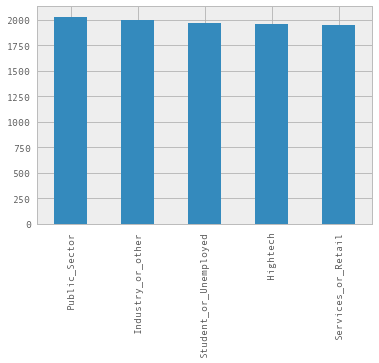

In [314]:
data['Occupation'].value_counts().plot(kind='bar')
print('Null values: '+str(data['Occupation'].isnull().sum()))
data['Occupation_cat'] = data['Occupation'].astype("category")
data['Occupation_int'] = data['Occupation_cat'].cat.rename_categories(range(data['Occupation_cat'].nunique())).astype(int)
print('Unique values: '+str(data['Occupation_int'].unique()))

In [315]:
data = data.drop(['Looking_at_poles_results','Married','Gender','Voting_Time','Financial_agenda_matters','Most_Important_Issue','Most_Important_Issue_cat','Age_group','Age_group_cat','Will_vote_only_large_party','Will_vote_only_large_party_cat','Main_transportation','Will_vote_only_large_party_cat','Main_transportation','Main_transportation_cat','Occupation','Occupation_cat'], axis=1) 

In [316]:
data.describe()

,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Financial_balance_score_(0-1),%Of_Household_Income,Avg_government_satisfaction,Avg_education_importance,Avg_environmental_importance,...,Looking_at_poles_results_int,Married_int,Gender_int,Voting_Time_int,Financial_agenda_matters_int,Most_Important_Issue_int,Age_group_int,Will_vote_only_large_party_int,Main_transportation_int,Occupation_int
count,9809.000000,9809.000000,9818.000000,9829.000000,9794.000000,9810.000000,9813.000000,9806.000000,9823.000000,9783.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,5.511367,507.643792,67380.919408,169.002686,402.579462,0.500668,0.500361,4.987585,5.007205,5.003874,...,0.133800,0.796600,0.494400,0.494700,0.492200,-8.393269e+16,-7.747633e+16,-5.718491e+16,-7.839866e+16,-9.223372e+16
std,2.855781,433.518917,69473.844694,144.476593,133.557107,0.288094,0.286215,2.895290,2.885800,2.893176,...,0.366212,0.419817,0.514194,0.519036,0.518234,8.758849e+17,8.418202e+17,7.240304e+17,8.467735e+17,9.177598e+17
min,1.000000,-855.714730,-166375.186748,-285.238243,1.511957,0.000078,0.000413,0.000001,0.000048,0.000591,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-9.223372e+18,-9.223372e+18,-9.223372e+18,-9.223372e+18,-9.223372e+18
25%,3.000000,199.225499,24420.519122,66.121900,307.042438,0.248523,0.255014,2.467898,2.524549,2.497779,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
50%,6.000000,387.469720,48410.029203,128.670084,389.081350,0.500569,0.503486,4.996661,5.039814,4.958118,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
75%,8.000000,708.293034,86099.873686,235.848891,479.527037,0.746059,0.743708,7.492286,7.467005,7.502315,...,0.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
max,10.000000,2305.237140,560309.089996,768.412380,855.997552,0.999887,0.999597,9.999719,9.997036,9.999264,...,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00


In [317]:
print("Number of nulls after exploration: "+str(data.isnull().sum().sum()))

Number of nulls after exploration: 5113


In [318]:
data.select_dtypes(exclude=['floating','int']).describe()

,Vote
count,10000
unique,10
top,Purples
freq,2067


## Data preperation:

### Data Imputation:

Null values: 0 out of: 10000


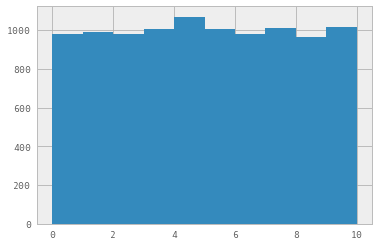

In [329]:
print('Null values: '+str(data['Avg_environmental_importance'].isnull().sum())+' out of: '+str(data['Avg_environmental_importance'].notnull().sum()))
data['Avg_environmental_importance'].hist()
data['Avg_environmental_importance'].describe()
data['Avg_environmental_importance_isNull'] = pd.isnull(data.Avg_environmental_importance).astype(int)
data['Avg_environmental_importance'] = data['Avg_environmental_importance'].interpolate()

The data is distributed pretty much uniformly, so I will use interpolation here.

Null values: 210


count    9790.000000
mean     6497.836874
std      2003.184707
min      3000.000000
25%      4791.250000
50%      6491.000000
75%      8225.000000
max      9999.000000
Name: Yearly_ExpensesK, dtype: float64

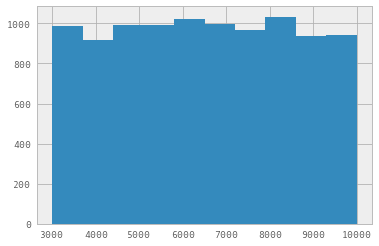

In [279]:
print('Null values: '+str(data['Yearly_ExpensesK'].isnull().sum()))
data['Yearly_ExpensesK'].hist()
data['Yearly_ExpensesK'].describe()


The data is distributed pretty much uniformly, so I may want to use EM.

Null values: 206


count    9794.000000
mean      402.579462
std       133.557107
min         1.511957
25%       307.042438
50%       389.081350
75%       479.527037
max       855.997552
Name: Garden_sqr_meter_per_person_in_residancy_area, dtype: float64

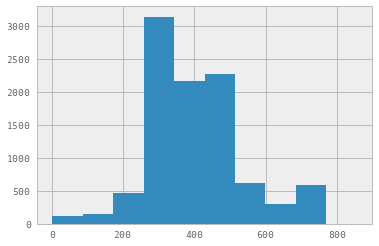

In [280]:
print('Null values: '+str(data['Garden_sqr_meter_per_person_in_residancy_area'].isnull().sum()))
data['Garden_sqr_meter_per_person_in_residancy_area'].hist()
data['Garden_sqr_meter_per_person_in_residancy_area'].describe()

The data is distributed close enough to normal, so I may want to use mean.

Null values: 205


count    9795.000000
mean        0.662685
std         1.039230
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: Num_of_kids_born_last_10_years, dtype: float64

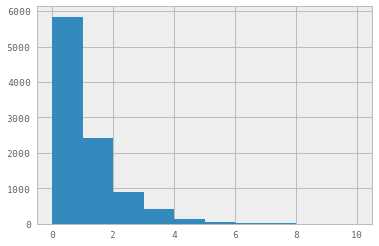

In [151]:
print('Null values: '+str(data['Num_of_kids_born_last_10_years'].isnull().sum()))
data['Num_of_kids_born_last_10_years'].hist()
data['Num_of_kids_born_last_10_years'].describe()

The data is distributed pretty much as I expected, with left bias, so I may want to use the median here.

Null values: 205


count    9795.000000
mean       50.485939
std        29.089206
min         0.005870
25%        24.948666
50%        50.628891
75%        75.849041
max        99.996897
Name: %Time_invested_in_work, dtype: float64

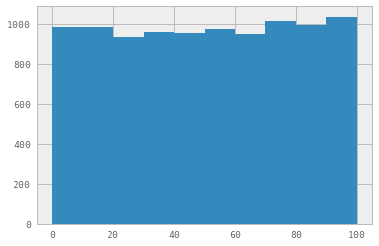

In [152]:
print('Null values: '+str(data['%Time_invested_in_work'].isnull().sum()))
data['%Time_invested_in_work'].hist()
data['%Time_invested_in_work'].describe()

The data is distributed pretty much uniformly, so I may want to use EM.

Null values: 203


count    9797.000000
mean      209.321953
std       108.067552
min         7.141800
25%       130.719573
50%       210.695887
75%       262.212294
max       822.382848
Name: Weighted_education_rank, dtype: float64

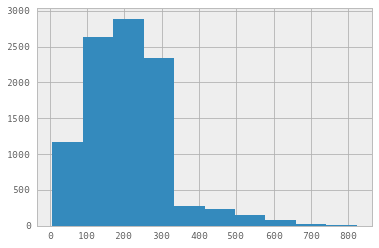

In [153]:
print('Null values: '+str(data['Weighted_education_rank'].isnull().sum()))
data['Weighted_education_rank'].hist()
data['Weighted_education_rank'].describe()

The data is distributed pretty much as I expected, with left bias, so I may want to use the median here.

Null values: 198


count    9802.000000
mean     4903.513229
std      1403.175058
min        22.935633
25%      3932.797969
50%      4709.669212
75%      5646.993685
max      9284.400211
Name: Avg_monthly_expense_on_pets_or_plants, dtype: float64

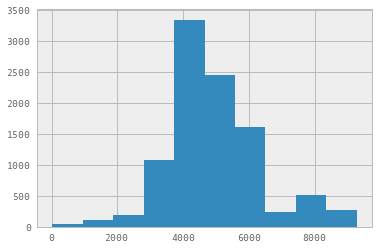

In [154]:
print('Null values: '+str(data['Avg_monthly_expense_on_pets_or_plants'].isnull().sum()))
data['Avg_monthly_expense_on_pets_or_plants'].hist()
data['Avg_monthly_expense_on_pets_or_plants'].describe()

The data distribution is pretty surprising , it looks pretty much normal, so I may want to use the mean here.

Null values: 198


count    9802.000000
mean       49.823139
std        29.111249
min         0.012620
25%        24.468975
50%        49.709433
75%        75.281457
max        99.984046
Name: %_satisfaction_financial_policy, dtype: float64

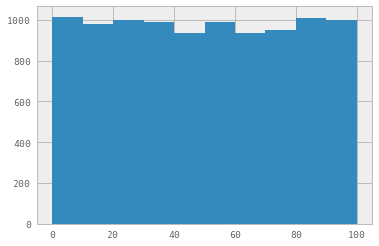

In [115]:
print('Null values: '+str(data['%_satisfaction_financial_policy'].isnull().sum()))
data['%_satisfaction_financial_policy'].hist()
data['%_satisfaction_financial_policy'].describe()

The data is distributed pretty much uniformly, so I may want to use EM.

Null values: 195


count    9805.000000
mean      679.246658
std       126.580099
min        26.670526
25%       603.732611
50%       672.463176
75%       767.770344
max      1060.929552
Name: Political_interest_Total_Score, dtype: float64

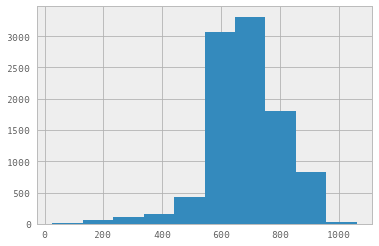

In [155]:
print('Null values: '+str(data['Political_interest_Total_Score'].isnull().sum()))
data['Political_interest_Total_Score'].hist()
data['Political_interest_Total_Score'].describe()

The data is distributed with a right bias, so I may want to use the median here.

Null values: 194


count    9806.000000
mean       20.737681
std         2.847497
min         1.092153
25%        19.506124
50%        20.779797
75%        22.268272
max        28.671832
Name: Avg_size_per_room, dtype: float64

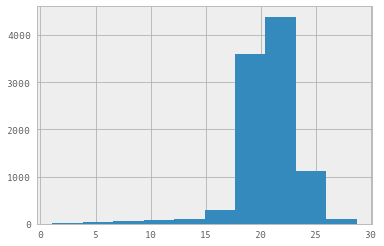

In [117]:
print('Null values: '+str(data['Avg_size_per_room'].isnull().sum()))
data['Avg_size_per_room'].hist()
data['Avg_size_per_room'].describe()

The data is distributed with a right bias, so I may want to use the median here.

Null values: 194


count    9806.000000
mean        4.987585
std         2.895290
min         0.000001
25%         2.467898
50%         4.996661
75%         7.492286
max         9.999719
Name: Avg_government_satisfaction, dtype: float64

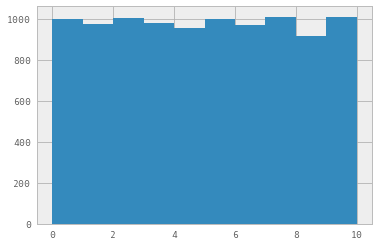

In [118]:
print('Null values: '+str(data['Avg_government_satisfaction'].isnull().sum()))
data['Avg_government_satisfaction'].hist()
data['Avg_government_satisfaction'].describe()

The data is distributed pretty much uniformly, so I may want to use EM.

Null values: 191


count    9809.000000
mean        5.511367
std         2.855781
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: Occupation_Satisfaction, dtype: float64

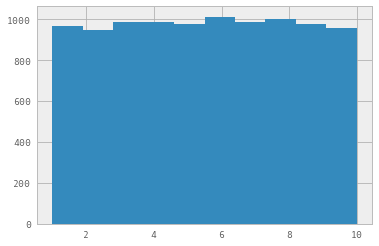

In [119]:
print('Null values: '+str(data['Occupation_Satisfaction'].isnull().sum()))
data['Occupation_Satisfaction'].hist()
data['Occupation_Satisfaction'].describe()

This result is rather disappointing, it means that people's opinion about the occupation is somewhat random... I go with EM.

Null values: 191


count    9809.000000
mean      507.643792
std       433.518917
min      -855.714730
25%       199.225499
50%       387.469720
75%       708.293034
max      2305.237140
Name: Avg_monthly_expense_when_under_age_21, dtype: float64

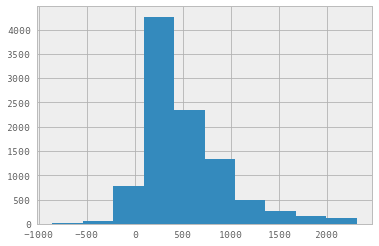

In [120]:
print('Null values: '+str(data['Avg_monthly_expense_when_under_age_21'].isnull().sum()))
data['Avg_monthly_expense_when_under_age_21'].hist()
data['Avg_monthly_expense_when_under_age_21'].describe()

The data is distributed close enough to normal, so I may want to use mean.

Null values: 190


count    9810.000000
mean        0.500668
std         0.288094
min         0.000078
25%         0.248523
50%         0.500569
75%         0.746059
max         0.999887
Name: Financial_balance_score_(0-1), dtype: float64

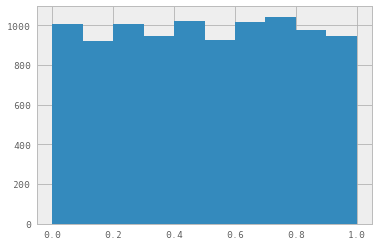

In [121]:
print('Null values: '+str(data['Financial_balance_score_(0-1)'].isnull().sum()))
data['Financial_balance_score_(0-1)'].hist()
data['Financial_balance_score_(0-1)'].describe()

The data is distributed pretty much uniformly, so I may want to use EM.

Null values: 188


count     9812.000000
mean     53123.228956
std      10176.177268
min       2033.869585
25%      47228.700051
50%      52987.621064
75%      58619.115582
max      84501.359760
Name: Avg_monthly_household_cost, dtype: float64

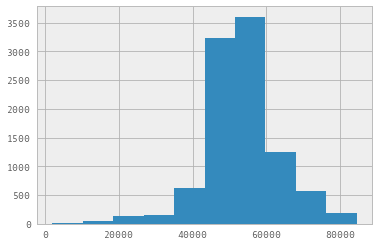

In [124]:
print('Null values: '+str(data['Avg_monthly_household_cost'].isnull().sum()))
data['Avg_monthly_household_cost'].hist()
data['Avg_monthly_household_cost'].describe()

The data is distributed close enough to normal, so I may want to use mean.

Null values: 188


count    9812.000000
mean      438.067689
std       104.906893
min         1.192798
25%       380.418268
50%       431.929888
75%       495.842797
max       822.073937
Name: Yearly_IncomeK, dtype: float64

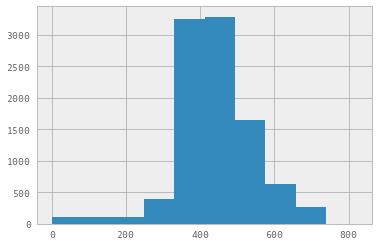

In [125]:
print('Null values: '+str(data['Yearly_IncomeK'].isnull().sum()))
data['Yearly_IncomeK'].hist()
data['Yearly_IncomeK'].describe()

The data is distributed close enough to normal, so I may want to use mean.

count    9813.000000
mean        0.500361
std         0.286215
min         0.000413
25%         0.255014
50%         0.503486
75%         0.743708
max         0.999597
Name: %Of_Household_Income, dtype: float64

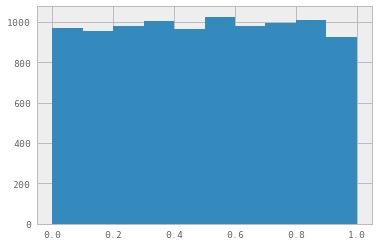

In [68]:
print('Null values: '+str(data['%Of_Household_Income'].isnull().sum()))
data['%Of_Household_Income'].hist()
data['%Of_Household_Income'].describe()

The data is distributed pretty much uniformly, so I may want to use EM.

count    9816.000000
mean       10.003362
std         2.775684
min         5.000000
25%         8.000000
50%        10.000000
75%        12.000000
max        16.000000
Name: Number_of_valued_Kneset_members, dtype: float64

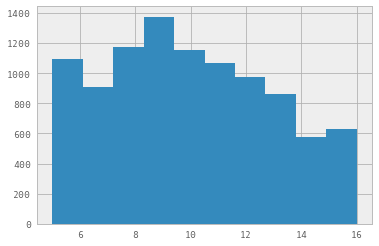

In [69]:
print('Null values: '+str(data['Number_of_valued_Kneset_members'].isnull().sum()))
data['Number_of_valued_Kneset_members'].hist()
data['Number_of_valued_Kneset_members'].describe()

The data is distributed pretty much uniformly, so I may want to use EM.

Null values: 182


count      9818.000000
mean      67380.919408
std       69473.844694
min     -166375.186748
25%       24420.519122
50%       48410.029203
75%       86099.873686
max      560309.089996
Name: AVG_lottary_expanses, dtype: float64

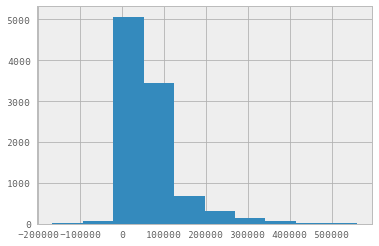

In [126]:
print('Null values: '+str(data['AVG_lottary_expanses'].isnull().sum()))
data['AVG_lottary_expanses'].hist()
data['AVG_lottary_expanses'].describe()

The data is distributed with a left bias, so I may want to use the median here. Also, it seems that there are negative outliars.

Null values: 178


count    9822.000000
mean      489.970994
std       114.889986
min         1.641626
25%       420.440579
50%       484.003063
75%       562.308711
max       810.486075
Name: Overall_happiness_score, dtype: float64

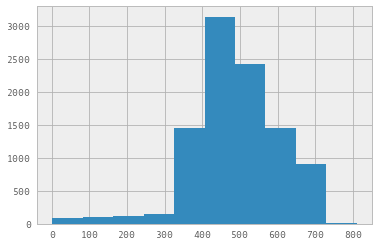

In [128]:
print('Null values: '+str(data['Overall_happiness_score'].isnull().sum()))
data['Overall_happiness_score'].hist()
data['Overall_happiness_score'].describe()

    The data is distributed close enough to normal, so I may want to use mean.

count      9822.000000
mean     179865.608911
std      119407.132412
min           2.286014
25%       94209.852375
50%      151463.700276
75%      229946.179636
max      732731.809380
Name: Phone_minutes_10_years, dtype: float64

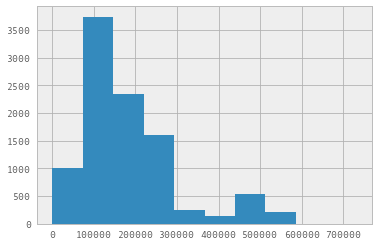

In [72]:
print('Null values: '+str(data['Phone_minutes_10_years'].isnull().sum()))
data['Phone_minutes_10_years'].hist()
data['Phone_minutes_10_years'].describe()

The data is distributed with a left bias, so I may want to use the median here.

Null values: 177


count    9823.000000
mean        4.972167
std         2.890531
min         0.001093
25%         2.442561
50%         4.988862
75%         7.505488
max         9.999959
Name: Avg_Residancy_Altitude, dtype: float64

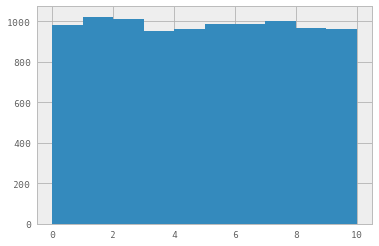

In [130]:
print('Null values: '+str(data['Avg_Residancy_Altitude'].isnull().sum()))
data['Avg_Residancy_Altitude'].hist()
data['Avg_Residancy_Altitude'].describe()

The data is distributed pretty much uniformly, so I may want to use EM.

count      9824.000000
mean      49720.908740
std       84550.825549
min           9.832899
25%        4637.836638
50%       17013.740107
75%       56112.165912
max      591235.998174
Name: Avg_monthly_income_all_years, dtype: float64

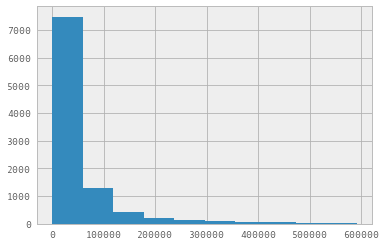

In [74]:
print('Null values: '+str(data['Avg_monthly_income_all_years'].isnull().sum()))
data['Avg_monthly_income_all_years'].hist()
data['Avg_monthly_income_all_years'].describe()

The data is distributed with a left bias, so I may want to use the median here.

count    9829.000000
mean      169.002686
std       144.476593
min      -285.238243
25%        66.121900
50%       128.670084
75%       235.848891
max       768.412380
Name: Avg_Satisfaction_with_previous_vote, dtype: float64

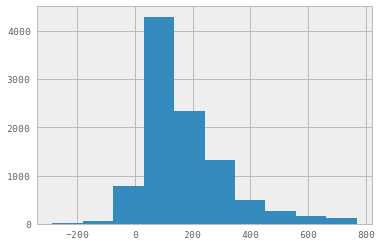

In [75]:
print('Null values: '+str(data['Avg_Satisfaction_with_previous_vote'].isnull().sum()))
data['Avg_Satisfaction_with_previous_vote'].hist()
data['Avg_Satisfaction_with_previous_vote'].describe()

The data is distributed with a left bias, so I may want to use the median here.

count    9835.000000
mean       73.415353
std        20.021796
min        30.000000
25%        60.000000
50%        70.000000
75%        90.000000
max       100.000000
Name: Last_school_grades, dtype: float64

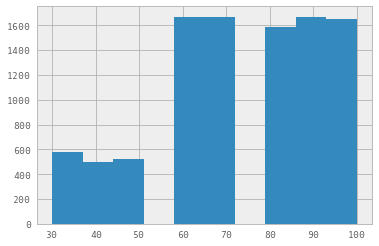

In [76]:
print('Null values: '+str(data['Last_school_grades'].isnull().sum()))
data['Last_school_grades'].hist()
data['Last_school_grades'].describe()

count    9835.000000
mean        1.998983
std         1.252778
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: Number_of_differnt_parties_voted_for, dtype: float64

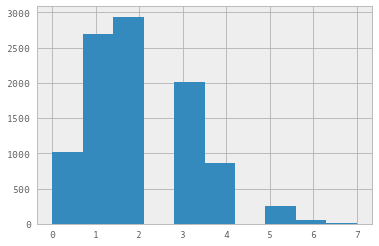

In [77]:
print('Null values: '+str(data['Number_of_differnt_parties_voted_for'].isnull().sum()))
data['Number_of_differnt_parties_voted_for'].hist()
data['Number_of_differnt_parties_voted_for'].describe()

Null values: 0


array([0, 2, 3, 4, 1, 5])

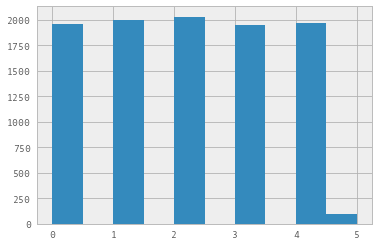

In [135]:
print('Null values: '+str(data['Occupation_int'].isnull().sum()))
data['Occupation_int'].replace(to_replace=-9223372036854775808, value=5, inplace=True)
data['Occupation_int'].hist()
data['Occupation_int'].unique()

Null values: 0


array([3, 2, 1, 0, 4])

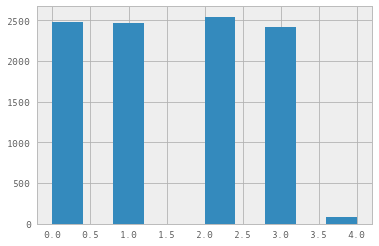

In [134]:
print('Null values: '+str(data['Main_transportation_int'].isnull().sum()))
data['Main_transportation_int'].replace(to_replace=-9223372036854775808, value=4, inplace=True)
data['Main_transportation_int'].hist()
data['Main_transportation_int'].unique()

array([ 0,  1, -1])

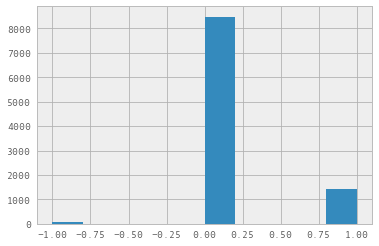

In [80]:
print('Null values: '+str(data['Looking_at_poles_results_int'].isnull().sum()))
data['Looking_at_poles_results_int'].hist()
data['Looking_at_poles_results_int'].unique()

array([ 1,  0, -1])

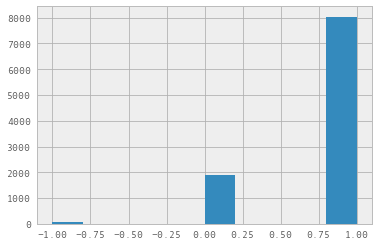

In [81]:
print('Null values: '+str(data['Married_int'].isnull().sum()))
data['Married_int'].hist()
data['Married_int'].unique()

array([ 0,  1, -1])

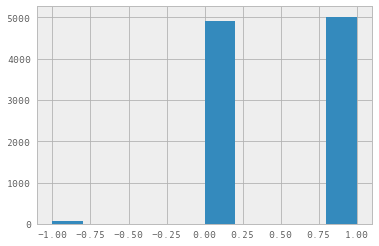

In [82]:
print('Null values: '+str(data['Gender_int'].isnull().sum()))
data['Gender_int'].hist()
data['Gender_int'].unique()

array([ 1,  0, -1])

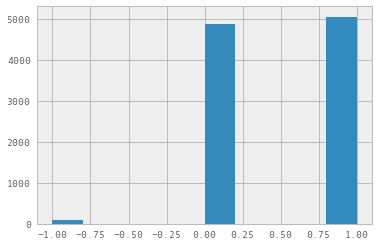

In [83]:
print('Null values: '+str(data['Voting_Time_int'].isnull().sum()))
data['Voting_Time_int'].hist()
data['Voting_Time_int'].unique()

array([ 0,  1, -1])

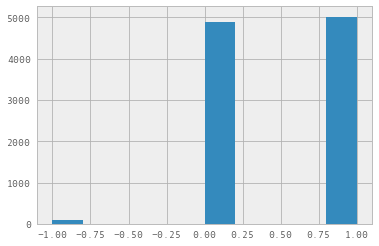

In [84]:
print('Null values: '+str(data['Financial_agenda_matters_int'].isnull().sum()))
data['Financial_agenda_matters_int'].hist()
data['Financial_agenda_matters_int'].unique()

Null values: 0


array([4, 1, 7, 5, 2, 0, 6, 3, 8])

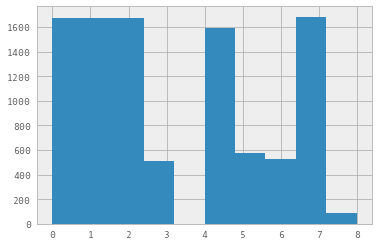

In [133]:
print('Null values: '+str(data['Most_Important_Issue_int'].isnull().sum()))
data['Most_Important_Issue_int'].replace(to_replace=-9223372036854775808, value=8, inplace=True)
data['Most_Important_Issue_int'].hist()
data['Most_Important_Issue_int'].unique()

Null values: 0


array([1, 0, 2, 3])

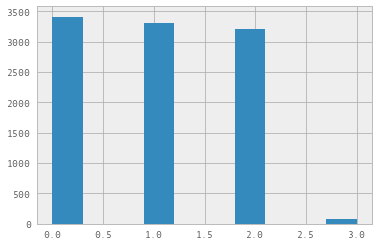

In [132]:
print('Null values: '+str(data['Age_group_int'].isnull().sum()))
data['Age_group_int'].replace(to_replace=-9223372036854775808, value=3, inplace=True)
data['Age_group_int'].hist()
data['Age_group_int'].unique()

Null values: 0


array([1, 2, 0, 3])

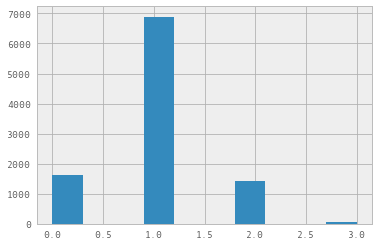

In [176]:
print('Null values: '+str(data['Will_vote_only_large_party_int'].isnull().sum()))
data['Will_vote_only_large_party_int'].replace(to_replace=-9223372036854775808, value=3, inplace=True)
data['Will_vote_only_large_party_int'].hist()
data['Will_vote_only_large_party_int'].unique()

In [156]:
data.isnull().sum().sort_values(ascending=False)

Avg_environmental_importance                     217
Yearly_ExpensesK                                 210
Garden_sqr_meter_per_person_in_residancy_area    206
Num_of_kids_born_last_10_years                   205
%Time_invested_in_work                           205
Weighted_education_rank                          203
Avg_monthly_expense_on_pets_or_plants            198
%_satisfaction_financial_policy                  198
Political_interest_Total_Score                   195
Avg_size_per_room                                194
Avg_government_satisfaction                      194
Occupation_Satisfaction                          191
Avg_monthly_expense_when_under_age_21            191
Financial_balance_score_(0-1)                    190
Avg_monthly_household_cost                       188
Yearly_IncomeK                                   188
%Of_Household_Income                             187
Number_of_valued_Kneset_members                  184
AVG_lottary_expanses                          

Data Cleansing:

Normalization:

Feature Selection:

## Split data to train, test and validation:

In [52]:
train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

## Save to csv:

In [54]:
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)
validate.to_csv("validate.csv", index=False)